                       ds     y unique_id
0     2016-11-09 13:03:00   0.0   garage1
1     2016-11-09 13:04:00   0.0   garage1
2     2016-11-09 13:05:00   0.0   garage1
3     2016-11-09 13:06:00   0.0   garage1
4     2016-11-09 13:07:00   0.0   garage1
...                   ...   ...       ...
12892 2016-11-18 11:55:00  82.0   garage1
12893 2016-11-18 11:56:00  79.0   garage1
12894 2016-11-18 11:57:00  84.0   garage1
12895 2016-11-18 11:58:00  88.0   garage1
12896 2016-11-18 11:59:00  87.0   garage1

[12897 rows x 3 columns]


<Axes: xlabel='ds'>

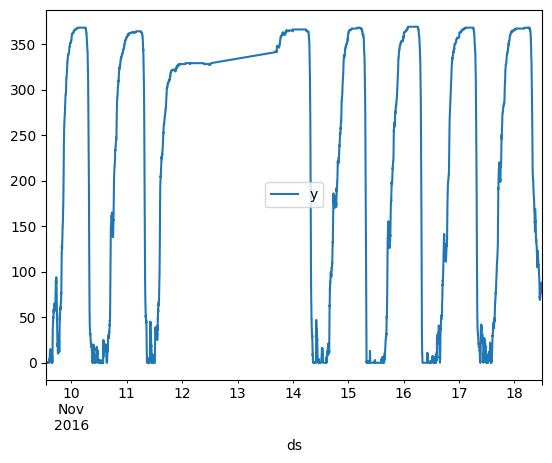

In [94]:
# Load data
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

path1 = 'Sign1_full_fitted.csv'
data1 = pd.read_csv(path1, usecols=[0,1], header=0)
data1['ts'] = pd.to_datetime(data1['ts'])
data1['unique_id'] = 'garage1'
data1 = data1.rename(columns={'ts': 'ds', 'y1': 'y'})
print(data1)
data1.plot(x = 'ds', y = 'y')

                       ds      y unique_id
0     2016-11-09 13:03:00    0.0   garage1
1     2016-11-09 13:04:00    0.0   garage1
2     2016-11-09 13:05:00    0.0   garage1
3     2016-11-09 13:06:00    0.0   garage1
4     2016-11-09 13:07:00    0.0   garage1
...                   ...    ...       ...
12892 2016-11-18 11:55:00  340.0   garage1
12893 2016-11-18 11:56:00  340.0   garage1
12894 2016-11-18 11:57:00  336.0   garage1
12895 2016-11-18 11:58:00  334.0   garage1
12896 2016-11-18 11:59:00  335.0   garage1

[12897 rows x 3 columns]


<Axes: xlabel='ds'>

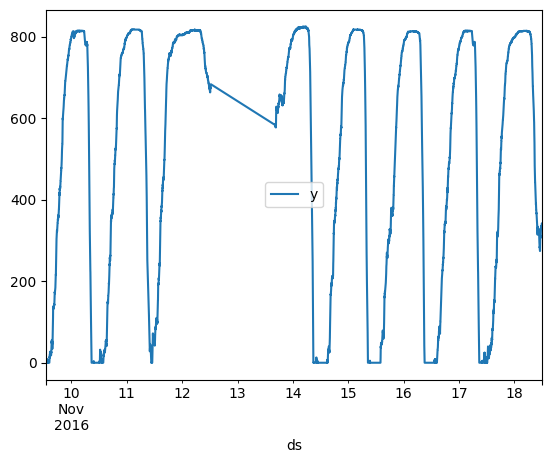

In [95]:
path2 = 'Sign12_full_fitted.csv'
data2 = pd.read_csv(path2, usecols=[0,1], header=0)
data2['ts'] = pd.to_datetime(data2['ts'])
data2['unique_id'] = 'garage1'
data2 = data2.rename(columns={'ts': 'ds', 'y12': 'y'})
print(data2)
data2.plot(x = 'ds', y = 'y')

In [96]:
path4 = 'Sign14_full_fitted.csv'
data4 = pd.read_csv(path4, usecols=[0,1], header=0)
print(data4)

                        ts    y14
0      2016-11-09 13:03:00   20.0
1      2016-11-09 13:04:00   20.0
2      2016-11-09 13:05:00   20.0
3      2016-11-09 13:06:00   16.0
4      2016-11-09 13:07:00   16.0
...                    ...    ...
12892  2016-11-18 11:55:00  333.0
12893  2016-11-18 11:56:00  334.0
12894  2016-11-18 11:57:00  335.0
12895  2016-11-18 11:58:00  336.0
12896  2016-11-18 11:59:00  335.0

[12897 rows x 2 columns]


In [132]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data1, test_size=0.2, shuffle=False)
test

,ds,y,unique_id
10317,2016-11-16 17:00:00,90.0,garage1
10318,2016-11-16 17:01:00,91.0,garage1
10319,2016-11-16 17:02:00,92.0,garage1
10320,2016-11-16 17:03:00,92.0,garage1
10321,2016-11-16 17:04:00,94.0,garage1
...,...,...,...
12892,2016-11-18 11:55:00,82.0,garage1
12893,2016-11-18 11:56:00,79.0,garage1
12894,2016-11-18 11:57:00,84.0,garage1
12895,2016-11-18 11:58:00,88.0,garage1


In [113]:
# from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

# models = [RandomForestRegressor(random_state=0, n_estimators=100),
#           ExtraTreesRegressor(random_state=0, n_estimators=100)]

In [114]:
# from numba import njit

# @njit
# def diff(x, lag):
#     x2 = np.full_like(x, np.nan)
#     for i in range(lag, len(x)):
#         x2[i] = x[i] - x[i-lag]
#     return x2

In [161]:
from mlforecast import MLForecast
from mlforecast.target_transforms import Differences
from sklearn.linear_model import LinearRegression

fcst = MLForecast(
    models=LinearRegression(),
    freq='T',  # our serie has a minutely frequency
    lags=[10],
    target_transforms=[Differences([1])],
)
fcst.fit(train)

MLForecast(models=[LinearRegression], freq=<Minute>, lag_features=['lag10'], date_features=[], num_threads=1)

In [162]:
#model.fit(train, id_col='unique_id', time_col='ds', target_col='y', static_features=[])

p = fcst.predict(100)
#p = p.merge(valid[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='left')

In [163]:
#model.preprocess(train, id_col='unique_id', time_col='ds', target_col='y', static_features=[])


In [164]:
# pd.Series(model.models_['RandomForestRegressor'].feature_importances_, index=model.ts.features_order_).sort_values(ascending=False).plot.bar(
            # figsize=(1280/96,720/96), title='RandomForestRegressor Feature Importance', xlabel='Features', ylabel='Importance')

In [165]:
# pd.Series(model.models_['ExtraTreesRegressor'].feature_importances_, index=model.ts.features_order_).sort_values(ascending=False).plot.bar(
#             figsize=(1280/96,720/96), title='ExtraTreeRegressor Feature Importance', xlabel='Features', ylabel='Importance')

In [166]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error

# X_train_initial = train[['ds']]  # For now, just using date as feature, but you can expand this
# y_train_initial = train['y']

# X_valid_initial = valid[['ds']]
# y_valid_initial = valid['y']

# predictions_initial = valid[['ds', 'y']].copy()

# for model_name, model_instance in models.items():
#     model_instance.fit(X_train_initial, y_train_initial)
#     predictions_initial[f'prediction{model_name}'] = model_instance.predict(X_valid_initial)
#     mae = mean_absolute_error(predictions_initial['y'], predictions_initial[f'prediction{model_name}'])
#     mse = mean_squared_error(predictions_initial['y'], predictions_initial[f'prediction{model_name}'])
#     print(f"Initial MAE for {model_name}: {mae}")
#     print(f"Initial MSE for {model_name}: {mse}")
#     print("-" * 40)

In [167]:
# def MAPE(Y_actual,Y_Predicted):
#     mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
#     return mape
# print(f"WMAPE RandomForestRegressor: {MAPE(p['y'], p['RandomForestRegressor'])}\nWMAPE ExtraTreesRegressor: {MAPE(p['y'], p['ExtraTreesRegressor'])}")

In [168]:
from utilsforecast.plotting import plot_series

fig = plot_series(test, p)

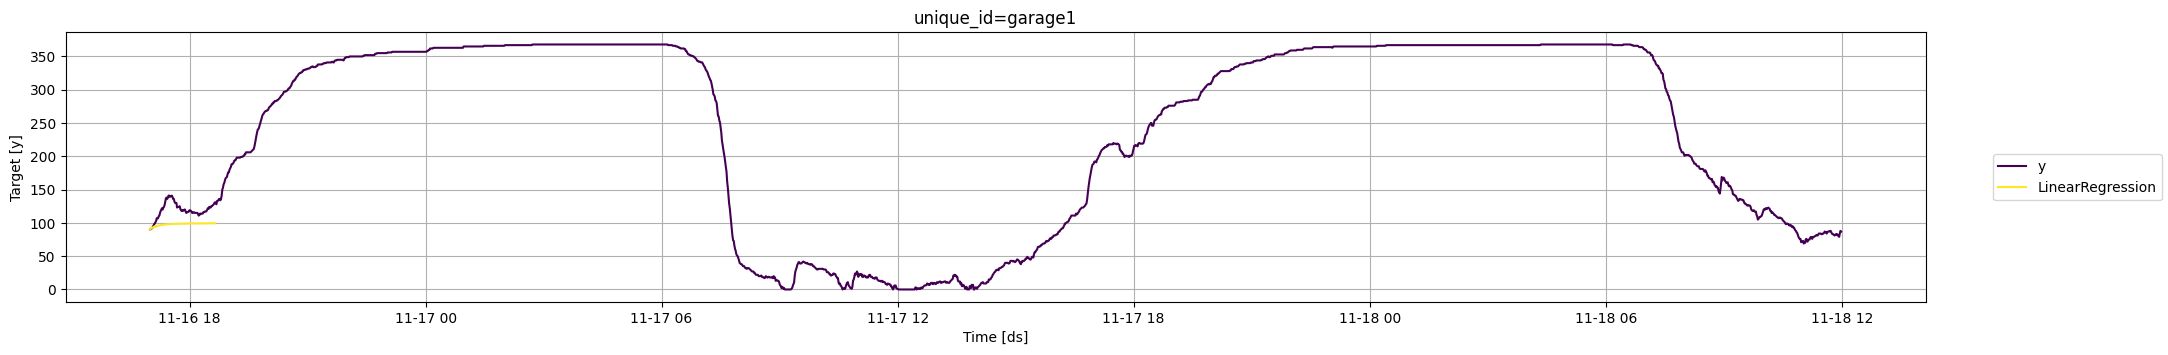

In [169]:
fig